In [1]:
# Imports, nothing to see here
import random
import math
import sys,os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sys.path.insert(0, os.path.abspath('..'))
from spreadsheet.cell import Cell
from spreadsheet.arraySpreadsheet import ArraySpreadsheet
from spreadsheet.linkedlistSpreadsheet import LinkedListSpreadsheet
from spreadsheet.csrSpreadsheet import CSRSpreadsheet
from spreadsheet.baseSpreadsheet import BaseSpreadsheet
from time import perf_counter

In [2]:
def create_random_cells(num_cells: int, max_col:int, max_row:int) -> list[Cell]:
    """
    num_cells: number of cells you want
    max_col: maximum number of columns you want in your spreadsheet
    max_row: maximum number of rows you want in your spreadsheet
    """
    lCells = []
    lCells.append(Cell((max_row-1),(max_col-1),round(random.uniform(0.1,9.9), ndigits=2)))
    for _ in range(num_cells):
        row = random.randint(0, max_col-1)
        col = random.randint(0, max_row-1)
        val = round(random.uniform(0.1,9.9), ndigits=2)
        lCells.append(Cell(row, col, val))
    return lCells

def create_density(density:float, max_cols:int, max_rows:int):
    """
    percentage is a float of the percent of non-None cells you want, e.g. 0.1 represents 10% cells
    with non-None values.
    """
    ret = []
    ret.append(Cell((max_rows-1),(max_cols-1),(round(random.uniform(0.1,9.9), ndigits=2))))
    cells_to_make = max_rows*max_cols*density-1
    while cells_to_make > 0:
        row = random.randint(0, max_cols-1)
        col = random.randint(0, max_rows-1)
        val = round(random.uniform(0.1,9.9), ndigits=2)
        ret.append(Cell(row, col,val))
        cells_to_make -=1
    return ret


def write_to_file(cells_to_generate:int, max_col:int, max_row:int):
    file = open("sample_data.txt","w")
    file.write(create_random_cells(cells_to_generate, max_col, max_row))
    file.close()

def display_array(array: ArraySpreadsheet):
    arr =array.array 
    for x in arr:
        for y in x:
            if(y.val == None):
                print("("+str(y.row),str(y.col)+" N)", end = " ")
            else:
                print(y, end = " ")
        print() #newline
    print("finished")

def get_lCells()->list[Cell]:
    """
    basically read from the file and create a list of cells from the data from the file
    """
    try:
        lcells = []
        dataFile = open("sample_data.txt", 'r')
        for line in dataFile:
            values = line.split()
            currRow = int(values[0])
            currCol = int(values[1])
            currVal = float(values[2])
            currCell = Cell(currRow, currCol, currVal)
            # each line contains a cell
            lcells.append(currCell)
        dataFile.close()
        return lcells
    except FileNotFoundError as e:
        print("Data file doesn't exist.")

def set_up_cells(cells_to_generate, max_col, max_row):
    write_to_file(cells_to_generate, max_col, max_row)
    return get_lCells()

def test_buildSpreadSheet(spreadSheet:BaseSpreadsheet,lCells:list[Cell]):
    start_time = perf_counter()
    spreadSheet.buildSpreadsheet(lCells)
    end_time = perf_counter()
    return end_time-start_time

def test_entries(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.entries()
    end_time = perf_counter()
    return end_time-start_time

def test_update(spreadSheet:BaseSpreadsheet, rowIndex: int, colIndex:int, val:float):
    start_time = perf_counter()
    spreadSheet.update(rowIndex, colIndex,val)
    end_time = perf_counter()
    return end_time-start_time

def test_append_row(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendRow()
    end_time = perf_counter()
    return end_time-start_time

def test_append_col(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendCol()
    end_time = perf_counter()
    return end_time-start_time

def test_insert_row(spreadSheet:BaseSpreadsheet, rowIndex:int):
    start_time = perf_counter()
    spreadSheet.insertRow(rowIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_insert_col(spreadsheet:BaseSpreadsheet, colIndex:int):
    start_time = perf_counter()
    spreadsheet.insertCol(colIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_find(spreadSheet:BaseSpreadsheet, value:float):
    start_time = perf_counter()
    spreadSheet.find(value)
    end_time = perf_counter()
    return end_time-start_time

def different_densities(cells_to_generate:int):
    low = random.uniform(0.01,0.3)
    med = random.uniform(0.31,0.60)
    high = random.uniform(0.61,0.99)
    densities = [low, med, high ]
    lCells_list = []
    for x in densities:
        lCells_list.append(create_density(cells_to_generate,x))
    return lCells_list

def test_row_num(spreadsheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadsheet.rowNum()
    end_time = perf_counter()
    return end_time-start_time
def test_col_num(spreadsheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadsheet.colNum()
    end_time = perf_counter()
    return end_time-start_time

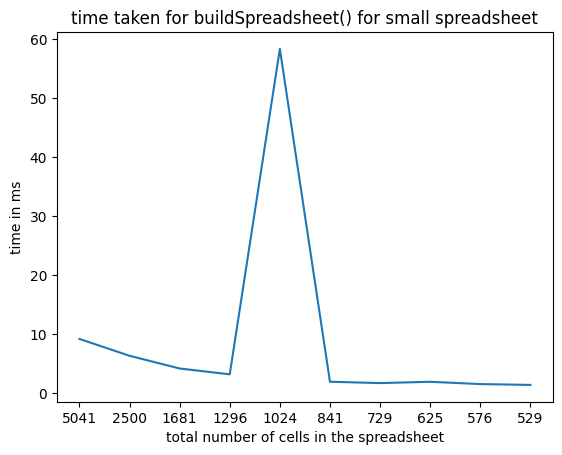

In [ ]:
#to test:
#3 different sizes -> 3 different  density
# 0.1, 0.5, 0.9
# (50,50) (500,500) (1000,1000)
#for all 3 of the abstract datat types


In [10]:
#generate datasets
#number of cells in each dataset:
#size/density:| 0.1   | 0.5    | 0.9
#50           | 250    | 1,250   |2,250
#100          | 1,000  | 5,000   |9,000
#500          | 2,5000 | 125,000 |225,000
datasets = []

for x in [0.1,0.5,0.9]:
    for y in [50,100,500]:
        datasets.append(create_density(x,y,y))

In [54]:
#create small arrays
small_spreadsheets = [ArraySpreadsheet(), ArraySpreadsheet(), ArraySpreadsheet()]
small_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(0,datasets.__len__(), 3):
    small_spreadsheets_tests.append(test_buildSpreadSheet(small_spreadsheets[counter],datasets[x])*1000)
    small_spreadsheets_tests.append(test_append_col(small_spreadsheets[counter])*1000)
    small_spreadsheets_tests.append(test_append_row(small_spreadsheets[counter])*1000)
    small_spreadsheets_tests.append(test_insert_col(small_spreadsheets[counter],x)*1000)
    small_spreadsheets_tests.append(test_insert_row(small_spreadsheets[counter],x)*1000)
    small_spreadsheets_tests.append(test_col_num(small_spreadsheets[counter])*1000)
    small_spreadsheets_tests.append(test_row_num(small_spreadsheets[counter])*1000)
    small_spreadsheets_tests.append(test_entries(small_spreadsheets[counter])*1000)
    small_spreadsheets_tests.append(test_update(small_spreadsheets[counter],x,x,x)*1000)
    small_spreadsheets_tests.append(test_find(small_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
small_df = pd.DataFrame()
small_df["low_density"] = small_spreadsheets_tests[0:10]
small_df["med_density"]= small_spreadsheets_tests[10:20]
small_df["high_density"] = small_spreadsheets_tests[20:30]

small_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(small_df)

,low_density,med_density,high_density
build_spreadsheet,0.823875,1.699458,1.900125
append_col,0.011416,0.011958,0.011750
append_row,0.027541,0.014750,0.013833
insert_col,0.243166,0.240250,0.389375
insert_row,0.157791,0.158583,0.139833
col_num,0.000208,0.000250,0.000167
row_num,0.000125,0.000167,0.000208
entries,0.505000,2.044708,3.169334
update,0.000417,0.001459,0.000791
find,0.181166,0.248834,0.207291


In [55]:
#create medium arrays
med_spreadsheets = [ArraySpreadsheet(), ArraySpreadsheet(), ArraySpreadsheet()]
med_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(1,datasets.__len__(), 3):
    med_spreadsheets_tests.append(test_buildSpreadSheet(med_spreadsheets[counter],datasets[x])*1000)
    med_spreadsheets_tests.append(test_append_col(med_spreadsheets[counter])*1000)
    med_spreadsheets_tests.append(test_append_row(med_spreadsheets[counter])*1000)
    med_spreadsheets_tests.append(test_insert_col(med_spreadsheets[counter],x)*1000)
    med_spreadsheets_tests.append(test_insert_row(med_spreadsheets[counter],x)*1000)
    med_spreadsheets_tests.append(test_col_num(med_spreadsheets[counter])*1000)
    med_spreadsheets_tests.append(test_row_num(med_spreadsheets[counter])*1000)
    med_spreadsheets_tests.append(test_entries(med_spreadsheets[counter])*1000)
    med_spreadsheets_tests.append(test_update(med_spreadsheets[counter],x,x,x)*1000)
    med_spreadsheets_tests.append(test_find(med_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
med_df = pd.DataFrame()
med_df["low_density"] = med_spreadsheets_tests[0:10]
med_df["med_density"]= med_spreadsheets_tests[10:20]
med_df["high_density"] = med_spreadsheets_tests[20:30]

med_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(med_df)

,low_density,med_density,high_density
build_spreadsheet,585.950958,184.465417,324.042916
append_col,9.822375,32.618375,52.603208
append_row,0.208208,0.164833,0.187791
insert_col,29.679250,47.294166,58.373750
insert_row,20.410500,30.673458,48.449167
col_num,0.001625,0.002333,0.002333
row_num,0.000667,0.000708,0.000708
entries,87.337750,374.647834,582.853875
update,0.002417,0.003042,0.004834
find,24.749083,40.525375,57.701708


In [11]:
#create large arrays
large_spreadsheets = [ArraySpreadsheet(), ArraySpreadsheet(), ArraySpreadsheet()]
large_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(2,datasets.__len__(), 3):
    large_spreadsheets_tests.append(test_buildSpreadSheet(large_spreadsheets[counter],datasets[x])*1000)
    large_spreadsheets_tests.append(test_append_col(large_spreadsheets[counter])*1000)
    large_spreadsheets_tests.append(test_append_row(large_spreadsheets[counter])*1000)
    large_spreadsheets_tests.append(test_insert_col(large_spreadsheets[counter],x)*1000)
    large_spreadsheets_tests.append(test_insert_row(large_spreadsheets[counter],x)*1000)
    large_spreadsheets_tests.append(test_col_num(large_spreadsheets[counter])*1000)
    large_spreadsheets_tests.append(test_row_num(large_spreadsheets[counter])*1000)
    large_spreadsheets_tests.append(test_entries(large_spreadsheets[counter])*1000)
    large_spreadsheets_tests.append(test_update(large_spreadsheets[counter],x,x,x)*1000)
    large_spreadsheets_tests.append(test_find(large_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
large_df = pd.DataFrame()
large_df["low_density"] = large_spreadsheets_tests[0:10]
large_df["med_density"]= large_spreadsheets_tests[10:20]
large_df["high_density"] = large_spreadsheets_tests[20:30]
large_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(large_df)

,low_density,med_density,high_density
build_spreadsheet,142.280084,226.807375,284.061875
append_col,5.001792,53.090042,67.014750
append_row,0.202375,0.225667,0.177167
insert_col,63.842042,66.339584,63.824000
insert_row,52.422500,50.174375,47.944916
col_num,0.001709,0.002333,0.002084
row_num,0.000958,0.000875,0.000791
entries,134.431250,456.830333,604.300583
update,0.003209,0.002750,0.005833
find,64.815583,52.832667,55.134208


In [5]:
#create small linkedlist
small_ll_spreadsheets = [LinkedListSpreadsheet(), LinkedListSpreadsheet(), LinkedListSpreadsheet()]
small_ll_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(0,datasets.__len__(), 3):
    small_ll_spreadsheets_tests.append(test_buildSpreadSheet(small_ll_spreadsheets[counter],datasets[x])*1000)
    small_ll_spreadsheets_tests.append(test_append_col(small_ll_spreadsheets[counter])*1000)
    small_ll_spreadsheets_tests.append(test_append_row(small_ll_spreadsheets[counter])*1000)
    small_ll_spreadsheets_tests.append(test_insert_col(small_ll_spreadsheets[counter],x)*1000)
    small_ll_spreadsheets_tests.append(test_insert_row(small_ll_spreadsheets[counter],x)*1000)
    small_ll_spreadsheets_tests.append(test_col_num(small_ll_spreadsheets[counter])*1000)
    small_ll_spreadsheets_tests.append(test_row_num(small_ll_spreadsheets[counter])*1000)
    small_ll_spreadsheets_tests.append(test_entries(small_ll_spreadsheets[counter])*1000)
    small_ll_spreadsheets_tests.append(test_update(small_ll_spreadsheets[counter],x,x,x)*1000)
    small_ll_spreadsheets_tests.append(test_find(small_ll_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
small_ll_df = pd.DataFrame()
small_ll_df["low_density"] = small_ll_spreadsheets_tests[0:10]
small_ll_df["med_density"]= small_ll_spreadsheets_tests[10:20]
small_ll_df["high_density"] = small_ll_spreadsheets_tests[20:30]

small_ll_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(small_ll_df)

,low_density,med_density,high_density
build_spreadsheet,5.073792,10.002375,12.591833
append_col,0.054250,0.051042,0.038042
append_row,0.049959,0.041334,0.033333
insert_col,0.980459,0.912458,0.756375
insert_row,0.514375,0.457833,0.403083
col_num,0.004666,0.004458,0.003834
row_num,0.004833,0.004375,0.003958
entries,0.383375,0.499417,0.422500
update,0.001459,0.002666,0.002125
find,0.347000,0.364708,0.345667


In [8]:
#create medium linkedlist
med_ll_spreadsheets = [LinkedListSpreadsheet(), LinkedListSpreadsheet(), LinkedListSpreadsheet()]
med_ll_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(1,datasets.__len__(), 3):
    med_ll_spreadsheets_tests.append(test_buildSpreadSheet(med_ll_spreadsheets[counter],datasets[x])*1000)
    med_ll_spreadsheets_tests.append(test_append_col(med_ll_spreadsheets[counter])*1000)
    med_ll_spreadsheets_tests.append(test_append_row(med_ll_spreadsheets[counter])*1000)
    med_ll_spreadsheets_tests.append(test_insert_col(med_ll_spreadsheets[counter],x)*1000)
    med_ll_spreadsheets_tests.append(test_insert_row(med_ll_spreadsheets[counter],x)*1000)
    med_ll_spreadsheets_tests.append(test_col_num(med_ll_spreadsheets[counter])*1000)
    med_ll_spreadsheets_tests.append(test_row_num(med_ll_spreadsheets[counter])*1000)
    med_ll_spreadsheets_tests.append(test_entries(med_ll_spreadsheets[counter])*1000)
    med_ll_spreadsheets_tests.append(test_update(med_ll_spreadsheets[counter],x,x,x)*1000)
    med_ll_spreadsheets_tests.append(test_find(med_ll_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
med_ll_df = pd.DataFrame()
med_ll_df["low_density"] = med_ll_spreadsheets_tests[0:10]
med_ll_df["med_density"]= med_ll_spreadsheets_tests[10:20]
med_ll_df["high_density"] = med_ll_spreadsheets_tests[20:30]

med_ll_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(med_ll_df)

,low_density,med_density,high_density
build_spreadsheet,2561.306791,8222.584250,16141.162041
append_col,0.593417,0.659042,0.653833
append_row,0.479875,0.460416,0.437000
insert_col,69.808208,95.108708,107.428125
insert_row,39.001500,55.546833,78.049083
col_num,0.056125,0.065375,0.086792
row_num,0.145000,0.162167,0.162667
entries,35.989500,66.525166,78.495042
update,0.003417,0.009667,0.011041
find,34.489625,62.459375,77.007375


In [12]:
#create large linkedlist

large_ll_spreadsheets = [LinkedListSpreadsheet(), LinkedListSpreadsheet(), LinkedListSpreadsheet()]
large_ll_spreadsheets_tests =[]
#run the tests
counter = 0
for x in range(2,datasets.__len__(), 3):
    large_ll_spreadsheets_tests.append(test_buildSpreadSheet(large_ll_spreadsheets[counter],datasets[x])*1000)
    large_ll_spreadsheets_tests.append(test_append_col(large_ll_spreadsheets[counter])*1000)
    large_ll_spreadsheets_tests.append(test_append_row(large_ll_spreadsheets[counter])*1000)
    large_ll_spreadsheets_tests.append(test_insert_col(large_ll_spreadsheets[counter],x)*1000)
    large_ll_spreadsheets_tests.append(test_insert_row(large_ll_spreadsheets[counter],x)*1000)
    large_ll_spreadsheets_tests.append(test_col_num(large_ll_spreadsheets[counter])*1000)
    large_ll_spreadsheets_tests.append(test_row_num(large_ll_spreadsheets[counter])*1000)
    large_ll_spreadsheets_tests.append(test_entries(large_ll_spreadsheets[counter])*1000)
    large_ll_spreadsheets_tests.append(test_update(large_ll_spreadsheets[counter],x,x,x)*1000)
    large_ll_spreadsheets_tests.append(test_find(large_ll_spreadsheets[counter],x)*1000)
    counter +=1
#create a pandas data frame to make it all look nice and maybe for graph generation laters
large_ll_df = pd.DataFrame()
large_ll_df["low_density"] = large_ll_spreadsheets_tests[0:10]
large_ll_df["med_density"]= large_ll_spreadsheets_tests[10:20]
large_ll_df["high_density"] = large_ll_spreadsheets_tests[20:30]

large_ll_df.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row", "col_num", "row_num","entries", "update","find"]
display(large_ll_df)

,low_density,med_density,high_density
build_spreadsheet,9251.089959,12990.342416,21249.675375
append_col,0.634042,0.616083,0.680917
append_row,0.459833,0.453959,0.473208
insert_col,77.184209,108.719792,141.173042
insert_row,47.845292,82.020000,130.209792
col_num,0.071292,0.104125,0.112167
row_num,0.129250,0.164667,0.167125
entries,42.571833,78.582416,103.307166
update,0.004625,0.009209,0.010750
find,41.743833,74.426750,93.997833
